# **Potential Business plans for different areas of Gurugram, India**

In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import json
import xml
import pandas as pd

**Scraping Areas in Gurgaon**

In [2]:
url = requests.get('https://gurugram.gov.in/std-pin-codes/').text

In [3]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(url,'lxml')

print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   STD &amp; PIN Codes | Gurugram | India
  </title>
  <link href="http://gmpg.org/xfn/11" rel="profile"/>
  <link href="//s.w.org" rel="dns-prefetch"/>
  <meta content="Area STD code Gurgaon 0124 Area Pin code Akhera B.O 122107 Arjun Nagar S.O 122001 Baded B.O 122508 Badli B.O 122508 Badshahpur S.O 122101 Baghanki B.O 122105 Basai B.O 122006 Basai Road S.O 122001 Baslambi B.O 122503 Baspadamka B.O 122503 Bewan B.O 122104 Bhadas B.O 122108 Bhangrola B.O 122505 Bhirauti B.O 122103 Bhondsi S.O 122102 […]" name="description"/>
  <meta content="STD, &amp;, PIN, Codes, STD &amp; PIN Codes" name="keywords"/>
  <script type="text/javascript">
   window._wpemojiSettings = {"baseUrl":"https:\/\/s.w.org\/images\/core\/emoji\/12.0.0-1\/72x72\/","ext":".png","svgUrl":"https:\/\/s.w.org\/image

In [4]:
locality = soup.select('table')[-1] #data is stored in table tag
locality_rows = locality.find_all('tr') #each tr tag has one row of data

In [5]:
info=[]
for row in locality_rows:
  inf=row.text.split('\n')[1:-1]
  info.append(inf)
info

[['Area', 'Pin code'],
 ['Akhera B.O', '122107'],
 ['Arjun Nagar S.O', '122001'],
 ['Baded B.O', '122508'],
 ['Badli B.O', '122508'],
 ['Badshahpur S.O', '122101'],
 ['Baghanki B.O', '122105'],
 ['Basai B.O', '122006'],
 ['Basai Road S.O', '122001'],
 ['Baslambi B.O', '122503'],
 ['Baspadamka B.O', '122503'],
 ['Bewan B.O', '122104'],
 ['Bhadas B.O', '122108'],
 ['Bhangrola B.O', '122505'],
 ['Bhirauti B.O', '122103'],
 ['Bhondsi S.O', '122102'],
 ['Bhorakalan S.O', '122413'],
 ['Bichhor B.O', '122508'],
 ['Bilaspur Khurd B.O', '122413'],
 ['Bisru B.O', '122508'],
 ['Budarpur\xa0B.O', '122108'],
 ['Carterpuri\xa0B.O', '122017'],
 ['Chakkarpur\xa0B.O', '122002'],
 ['Chapera\xa0B.O', '122103'],
 ['Cheelarh\xa0B.O', '122502'],
 ['Damdama\xa0B.O', '122102'],
 ['Daulah\xa0B.O', '122103'],
 ['Daultabad\xa0B.O', '122006'],
 ['Dhani Chitarsain\xa0B.O', '122413'],
 ['Dhankot\xa0B.O', '122505'],
 ['DLF Ph-II S.O', '122008'],
 ['DLF Ph-III S.O', '122010'],
 ['DLF QE S.O', '122002'],
 ['Doha\xa0B.

In [6]:
loc_df=pd.DataFrame(info[1:], columns=info[0])
loc_df

,Area,Pin code
0,Akhera B.O,122107
1,Arjun Nagar S.O,122001
2,Baded B.O,122508
3,Badli B.O,122508
4,Badshahpur S.O,122101
...,...,...
162,Ujina B.O,122107
163,Umra B.O,122108
164,Unchamajra B.O,122503
165,Urban Estate S.O (Gurgaon),122001


**Merging areas with same Pincode**

In [7]:
grouped = loc_df.groupby(['Pin code'])
loc_grouped=loc_df.groupby(['Pin code'])
loc_grouped = grouped['Area'].apply(lambda x: x.sum())
loc_grouped = grouped['Area'].apply(lambda x: "%s" % ', '.join(x))
loc_final = loc_grouped.to_frame()
loc_final

,Area
Pin code,
122001,"Arjun Nagar S.O, Basai Road S.O, Gurgaon H.O, ..."
122002,"Chakkarpur B.O, DLF QE S.O, Nathupur B.O"
122003,"Gurgaon Sector 45 S.O, Gwal Pahari B.O, Hailym..."
122004,"Khandsa B.O, Kherki Kaula B.O, Lakhnaula B.O, ..."
122006,"Basai B.O, Daultabad B.O, Gurgaon Village B.O,..."
122007,Industrial Estate S.O (Gurgaon)
122008,DLF Ph-II S.O
122009,Galleria DLF-IV S.O
122010,DLF Ph-III S.O


In [8]:
loc_final

,Area
Pin code,
122001,"Arjun Nagar S.O, Basai Road S.O, Gurgaon H.O, ..."
122002,"Chakkarpur B.O, DLF QE S.O, Nathupur B.O"
122003,"Gurgaon Sector 45 S.O, Gwal Pahari B.O, Hailym..."
122004,"Khandsa B.O, Kherki Kaula B.O, Lakhnaula B.O, ..."
122006,"Basai B.O, Daultabad B.O, Gurgaon Village B.O,..."
122007,Industrial Estate S.O (Gurgaon)
122008,DLF Ph-II S.O
122009,Galleria DLF-IV S.O
122010,DLF Ph-III S.O


**Importing Coordinates of Pincodes**

In [9]:
url = 'https://raw.githubusercontent.com/milindsinha-bitspilani/Coworking_Potential/master/latlon.csv'
coord = pd.read_csv(url)

In [10]:
coord

,Pin code,Latitude,Longitude
0,122001,28.4555,77.0219
1,122002,28.4747,77.1049
2,122003,28.4421,77.0652
3,122004,28.4051,76.9758
4,122006,28.4814,76.9931
5,122007,28.4719,77.0579
6,122008,28.4930,77.0724
7,122009,28.4642,77.0823
8,122010,28.4859,77.1058
9,122011,28.4259,77.0976


In [11]:
coord.shape

(33, 3)

In [12]:
loc_final.shape

(33, 1)

In [13]:
coord['Pin code'] = coord['Pin code'].astype(str)

**Combining both datasets**

In [14]:
df_final=loc_final.merge(coord,on='Pin code')

In [15]:
df_final

,Pin code,Area,Latitude,Longitude
0,122001,"Arjun Nagar S.O, Basai Road S.O, Gurgaon H.O, ...",28.4555,77.0219
1,122002,"Chakkarpur B.O, DLF QE S.O, Nathupur B.O",28.4747,77.1049
2,122003,"Gurgaon Sector 45 S.O, Gwal Pahari B.O, Hailym...",28.4421,77.0652
3,122004,"Khandsa B.O, Kherki Kaula B.O, Lakhnaula B.O, ...",28.4051,76.9758
4,122006,"Basai B.O, Daultabad B.O, Gurgaon Village B.O,...",28.4814,76.9931
5,122007,Industrial Estate S.O (Gurgaon),28.4719,77.0579
6,122008,DLF Ph-II S.O,28.4930,77.0724
7,122009,Galleria DLF-IV S.O,28.4642,77.0823
8,122010,DLF Ph-III S.O,28.4859,77.1058
9,122011,Gurgaon Sector,28.4259,77.0976


In [16]:
df_final["Latitude"] = pd.to_numeric(df_final["Latitude"])
df_final["Longitude"] = pd.to_numeric(df_final["Longitude"])

**Map of Gurgaon**

In [17]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

/bin/bash: conda: command not found
/bin/bash: conda: command not found
Folium installed
Libraries imported.


In [18]:
map_gurgaon = folium.Map(location = [28.4595, 77.0266], zoom_start = 10)

#add pincode markers to the map
for lat, long, bor in zip(df_final['Latitude'], df_final['Longitude'], 
                                 df_final['Pin code']):
    label = '{}'.format(bor)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius = 7, 
        popup = label,
        color = 'red',
        fill = True,
        fill_color = 'white',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_gurgaon)
        
map_gurgaon

**Using Foursquare API**

In [19]:
# Define Foursquare Credentials and Versions

CLIENT_ID = 'PHIDI1OY5XIN54RPSQL4DCJARVIPWUSFJTMLDVGVCX2Z00ZV' # your Foursquare ID
CLIENT_SECRET = 'HZAO3E0QHFCWWWEUTPXOBHXJ04RMA0GYISQBN0FBWK1NKLYG' # your Foursquare Secret
VERSION = '20181102' # Foursquare API version

In [20]:
LIMIT = 100

radius = 500

url1 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    lat, 
    long, 
    VERSION, 
    radius, 
    LIMIT)

In [21]:
results = requests.get(url1).json()

**Finding most frequently visited venues of each area**

In [22]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url2 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                lat, 
                lng, 
                VERSION, 
                radius, 
                LIMIT)
            
        # make the GET request
        results = requests.get(url2).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
gurgaon_venues = getNearbyVenues(names=df_final['Area'],
                                   latitudes=df_final['Latitude'],
                                   longitudes=df_final['Longitude']
                                  )

Arjun Nagar S.O, Basai Road S.O, Gurgaon H.O, Gurgaon Kty. S.O, Gurgaon Sector 17 S.O, Gurgaon South City I S.O, Khandsa Road S.O, Mini Sectt. S.O, New Colony S.O (Gurgaon), Shivaji Nagar S.O (Gurgaon), Sohna Adda S.O, Urban Estate S.O (Gurgaon)
Chakkarpur B.O, DLF QE S.O, Nathupur B.O
Gurgaon Sector 45 S.O, Gwal Pahari B.O, Hailymandi S.O, Jharsa B.O, Smaspur B.O, Sohna S.O
Khandsa B.O, Kherki Kaula B.O, Lakhnaula B.O, Lohinga Kalan B.O, Narsinghpur S.O, Sikanderpur B.O
Basai B.O, Daultabad B.O, Gurgaon Village B.O, Railwary Road S.O
Industrial Estate S.O (Gurgaon)
DLF Ph-II S.O
Galleria DLF-IV S.O
DLF Ph-III S.O
Gurgaon Sector
Palam Road S.O, Sarhaul B.O
Dundahera B.O, Indir Mewat B.O, Industrial Complex Dundahera S.O
Carterpuri B.O, Palam Vihar S.O (Gurgaon)
Gurgaon South City II S.O
Kasan B.O, Manesar B.O, Nsg Camp Manesar S.O
IMT Manesar S.O
Badshahpur S.O, Fazilpur B.O, Kadipur B.O, Paltra B.O, Teekli B.O
Bhondsi S.O, Damdama B.O, Ghamroj B.O, Kherla B.O, Maruthi Kunj B.O, Raisia

In [24]:
gurgaon_venues

,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Arjun Nagar S.O, Basai Road S.O, Gurgaon H.O, ...",28.4555,77.0219,MaskAndMore,28.455562,77.023838,Shopping Plaza
1,"Arjun Nagar S.O, Basai Road S.O, Gurgaon H.O, ...",28.4555,77.0219,Pranami's Wellness Centre,28.455473,77.021902,Spa
2,"Arjun Nagar S.O, Basai Road S.O, Gurgaon H.O, ...",28.4555,77.0219,Malik Computer,28.454802,77.021170,Electronics Store
3,"Chakkarpur B.O, DLF QE S.O, Nathupur B.O",28.4747,77.1049,Binge Bakery,28.471200,77.102062,Bakery
4,"Chakkarpur B.O, DLF QE S.O, Nathupur B.O",28.4747,77.1049,Qutub Plaza,28.471709,77.102051,Office
...,...,...,...,...,...,...,...
97,Gurgaon South City II S.O,28.4181,77.0507,Good Earth City Centre,28.421766,77.053183,Shopping Mall
98,Gurgaon South City II S.O,28.4181,77.0507,D Block Market,28.417510,77.051001,Shopping Mall
99,Gurgaon South City II S.O,28.4181,77.0507,Unitech Arcadia,28.418470,77.053042,Shopping Mall
100,Gurgaon South City II S.O,28.4181,77.0507,chaayos,28.421366,77.053070,Tea Room


In [25]:
# one hot encoding
gurgaon_onehot = pd.get_dummies(gurgaon_venues[['Venue Category']], prefix="", prefix_sep="")

gurgaon_onehot['Area'] = gurgaon_venues['Area'] 

# move area column to the first column
fixed_columns = [gurgaon_onehot.columns[-1]] + list(gurgaon_onehot.columns[:-1])
gurgaon_onehot = gurgaon_onehot[fixed_columns]

gurgaon_onehot

,Area,ATM,American Restaurant,Asian Restaurant,Bagel Shop,Bakery,Bed & Breakfast,Beer Garden,Brazilian Restaurant,Breakfast Spot,Burger Joint,Business Service,Café,Chinese Restaurant,Coffee Shop,Department Store,Diner,Donut Shop,Electronics Store,Fast Food Restaurant,Food Truck,Gym,Hotel,Hotel Bar,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Miscellaneous Shop,Office,Pharmacy,Pizza Place,Playground,Pool,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Shopping Plaza,Snack Place,Spa,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Women's Store
0,"Arjun Nagar S.O, Basai Road S.O, Gurgaon H.O, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,"Arjun Nagar S.O, Basai Road S.O, Gurgaon H.O, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,"Arjun Nagar S.O, Basai Road S.O, Gurgaon H.O, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Chakkarpur B.O, DLF QE S.O, Nathupur B.O",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Chakkarpur B.O, DLF QE S.O, Nathupur B.O",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Gurgaon South City II S.O,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
98,Gurgaon South City II S.O,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
99,Gurgaon South City II S.O,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
100,Gurgaon South City II S.O,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [26]:
gurgaon_grouped = gurgaon_onehot.groupby('Area').mean().reset_index()

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
import numpy as np


In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
gurgaon_venues_sorted = pd.DataFrame(columns=columns)
gurgaon_venues_sorted['Area'] = gurgaon_grouped['Area']

for ind in np.arange(gurgaon_grouped.shape[0]):
    gurgaon_venues_sorted.iloc[ind, 1:] = return_most_common_venues(gurgaon_grouped.iloc[ind, :], num_top_venues)

gurgaon_venues_sorted

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Arjun Nagar S.O, Basai Road S.O, Gurgaon H.O, ...",Spa,Electronics Store,Shopping Plaza,Women's Store,Café,Gym,Food Truck,Fast Food Restaurant,Donut Shop,Diner
1,"Carterpuri B.O, Palam Vihar S.O (Gurgaon)",Café,Tennis Court,Market,Shopping Mall,Women's Store,Gym,Food Truck,Fast Food Restaurant,Electronics Store,Donut Shop
2,"Chakkarpur B.O, DLF QE S.O, Nathupur B.O",Indian Restaurant,Café,Pizza Place,Bakery,Sandwich Place,Coffee Shop,Office,Pharmacy,Chinese Restaurant,Food Truck
3,DLF Ph-III S.O,Café,Playground,Mediterranean Restaurant,Department Store,Hotel,Asian Restaurant,Bakery,Bed & Breakfast,Gym,Food Truck
4,"Dundahera B.O, Indir Mewat B.O, Industrial Com...",Pizza Place,Café,Thai Restaurant,Tea Room,Fast Food Restaurant,Donut Shop,Sandwich Place,Women's Store,Food Truck,Electronics Store
5,Galleria DLF-IV S.O,Café,Indian Restaurant,Hotel,Bakery,Italian Restaurant,Coffee Shop,Sandwich Place,Restaurant,Burger Joint,Diner
6,Gurgaon Sector,Gym,Pizza Place,Indian Restaurant,Asian Restaurant,Bakery,Snack Place,Market,Miscellaneous Shop,Food Truck,Fast Food Restaurant
7,"Gurgaon Sector 45 S.O, Gwal Pahari B.O, Hailym...",Food Truck,Women's Store,Indian Restaurant,Hotel,Gym,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,Department Store
8,Gurgaon South City II S.O,Shopping Mall,Tea Room,Women's Store,Café,Gym,Food Truck,Fast Food Restaurant,Electronics Store,Donut Shop,Diner
9,Industrial Estate S.O (Gurgaon),Hotel,Liquor Store,Pizza Place,Pool,Restaurant,Breakfast Spot,Shoe Store,Brazilian Restaurant,Bed & Breakfast,Japanese Restaurant


In [30]:
gurgaon_grouped_clustering = gurgaon_grouped.drop('Area', 1)

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [32]:
max_range = 12 # Maximum range of clusters

**Adding Average Plot Price per square meter of each area**

In [33]:
urlnew = 'https://raw.githubusercontent.com/milindsinha-bitspilani/Coworking_Potential/master/Plot.csv'
plotprice = pd.read_csv(urlnew)

In [34]:
plotprice

,Plot Rs/sq mt
0,120000
1,86300
2,166000
3,134000
4,125000
5,81000
6,190000
7,180000
8,205000
9,40000


In [35]:
import pandas as pd
from sklearn import preprocessing

x = plotprice.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_pp = pd.DataFrame(x_scaled)

In [36]:
df_pp.rename(columns={0:"Relative plot price"}, inplace=True)

In [37]:
final_merged = gurgaon_grouped_clustering.merge(df_pp, left_index=True, right_index=True, how='inner')

In [38]:
df_pp

,Relative plot price
0,0.484848
1,0.280606
2,0.763636
3,0.569697
4,0.515152
5,0.248485
6,0.909091
7,0.848485
8,1.000000
9,0.000000


In [39]:
gurgaon_venues_sorted_merged = gurgaon_venues_sorted.merge(df_pp, left_index=True, right_index=True, how='inner')

In [40]:
final_merged

,ATM,American Restaurant,Asian Restaurant,Bagel Shop,Bakery,Bed & Breakfast,Beer Garden,Brazilian Restaurant,Breakfast Spot,Burger Joint,Business Service,Café,Chinese Restaurant,Coffee Shop,Department Store,Diner,Donut Shop,Electronics Store,Fast Food Restaurant,Food Truck,Gym,Hotel,Hotel Bar,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Miscellaneous Shop,Office,Pharmacy,Pizza Place,Playground,Pool,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Shopping Plaza,Snack Place,Spa,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Women's Store,Relative plot price
0,0.0,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.0,0.000000,0.000,0.00,0.000000,0.000,0.000,0.333333,0.000,0.0,0.000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.333333,0.000,0.333333,0.000,0.000,0.00,0.000,0.0,0.484848
1,0.0,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.0,0.250000,0.000,0.00,0.000000,0.000,0.000,0.000000,0.000,0.0,0.000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000,0.250,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.250,0.000000,0.000,0.000000,0.000,0.000,0.25,0.000,0.0,0.280606
2,0.0,0.000,0.000000,0.000,0.100,0.000000,0.000,0.000000,0.000000,0.000,0.0,0.100000,0.100,0.10,0.000000,0.000,0.000,0.000000,0.000,0.0,0.000,0.000000,0.000,0.200000,0.00,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.1,0.1,0.100000,0.000000,0.000000,0.000000,0.000,0.100,0.000000,0.000,0.000000,0.000,0.000000,0.000,0.000,0.00,0.000,0.0,0.763636
3,0.0,0.000,0.166667,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.0,0.166667,0.000,0.00,0.166667,0.000,0.000,0.000000,0.000,0.0,0.000,0.166667,0.000,0.000000,0.00,0.000000,0.000000,0.000,0.000,0.166667,0.000,0.0,0.0,0.000000,0.166667,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.000000,0.000,0.000000,0.000,0.000,0.00,0.000,0.0,0.569697
4,0.0,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.0,0.125000,0.000,0.00,0.000000,0.000,0.125,0.000000,0.125,0.0,0.000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.0,0.0,0.250000,0.000000,0.000000,0.000000,0.000,0.125,0.000000,0.000,0.000000,0.000,0.000000,0.000,0.125,0.00,0.125,0.0,0.515152
5,0.0,0.025,0.025000,0.025,0.075,0.000000,0.025,0.000000,0.000000,0.025,0.0,0.150000,0.025,0.05,0.000000,0.025,0.000,0.000000,0.000,0.0,0.000,0.075000,0.025,0.125000,0.05,0.000000,0.000000,0.025,0.025,0.000000,0.000,0.0,0.0,0.025000,0.000000,0.000000,0.050000,0.025,0.050,0.000000,0.025,0.000000,0.000,0.000000,0.025,0.025,0.00,0.000,0.0,0.248485
6,0.0,0.000,0.125000,0.000,0.125,0.000000,0.000,0.000000,0.000000,0.000,0.0,0.000000,0.000,0.00,0.000000,0.000,0.000,0.000000,0.000,0.0,0.125,0.000000,0.000,0.125000,0.00,0.000000,0.000000,0.000,0.125,0.000000,0.125,0.0,0.0,0.125000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.000000,0.125,0.000000,0.000,0.000,0.00,0.000,0.0,0.909091
7,0.0,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.0,0.000000,0.000,0.00,0.000000,0.000,0.000,0.000000,0.000,1.0,0.000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.000000,0.000,0.000000,0.000,0.000,0.00,0.000,0.0,0.848485
8,0.0,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.0,0.000000,0.000,0.00,0.000000,0.000,0.000,0.000000,0.000,0.0,0.000,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.750,0.000000,0.000,0.000000,0.000,0.250,0.00,0.000,0.0,1.000000
9,0.0,0.000,0.000000,0.000,0.000,0.071429,0.000,0.071429,0.071429,0.000,0.0,0.000000,0.000,0.00,0.000000,0.000,0.000,0.000000,0.000,0.0,0.000,0.285714,0.000,0.071429,0.00,0.071429,0.071429,0.000,0.000,0.000000,0.000,0.0,0

In [41]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

**Calculating Optimum Number of Clusters**

In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    ggc = final_merged
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(ggc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(ggc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

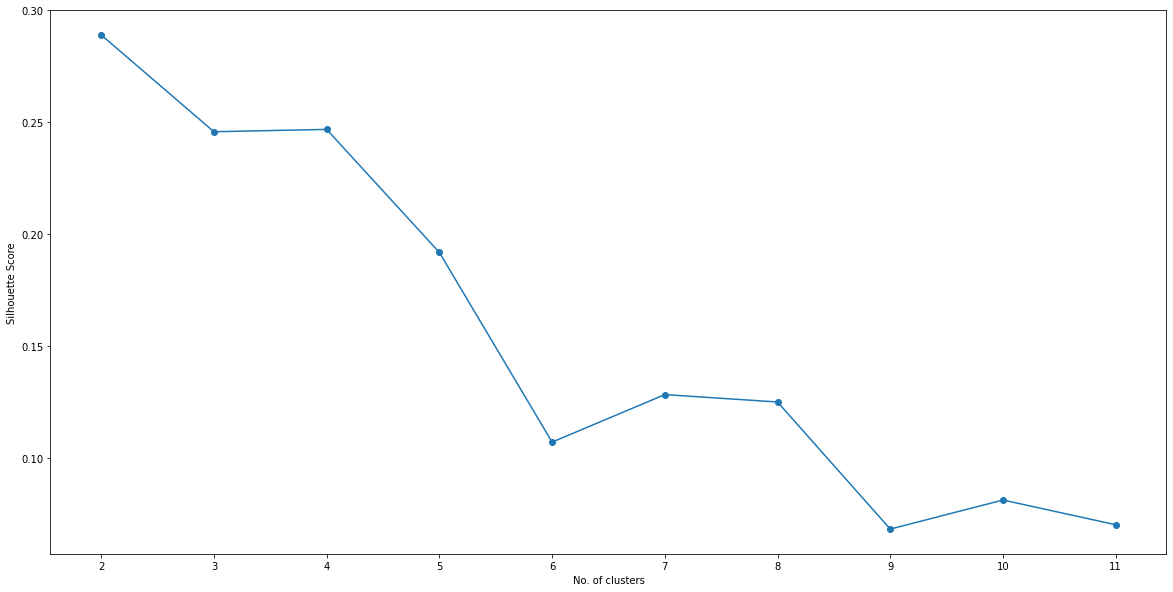

In [43]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [44]:
opt = np.argmax(scores) + 2 # Finds the optimal value
opt

2

**K-means Clustering**

In [45]:
kclusters = 4


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(final_merged)

In [46]:
gurgaon_venues_sorted_merged.insert(0, 'Cluster', kmeans.labels_)

final_merge = df_final

final_merge = final_merge.join(gurgaon_venues_sorted_merged.set_index('Area'), on='Area')

In [47]:
final_merge

,Pin code,Area,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Relative plot price
0,122001,"Arjun Nagar S.O, Basai Road S.O, Gurgaon H.O, ...",28.4555,77.0219,1.0,Spa,Electronics Store,Shopping Plaza,Women's Store,Café,Gym,Food Truck,Fast Food Restaurant,Donut Shop,Diner,0.484848
1,122002,"Chakkarpur B.O, DLF QE S.O, Nathupur B.O",28.4747,77.1049,1.0,Indian Restaurant,Café,Pizza Place,Bakery,Sandwich Place,Coffee Shop,Office,Pharmacy,Chinese Restaurant,Food Truck,0.763636
2,122003,"Gurgaon Sector 45 S.O, Gwal Pahari B.O, Hailym...",28.4421,77.0652,3.0,Food Truck,Women's Store,Indian Restaurant,Hotel,Gym,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,Department Store,0.848485
3,122004,"Khandsa B.O, Kherki Kaula B.O, Lakhnaula B.O, ...",28.4051,76.9758,1.0,Business Service,Shopping Mall,Café,Hotel,Gym,Food Truck,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,0.424242
4,122006,"Basai B.O, Daultabad B.O, Gurgaon Village B.O,...",28.4814,76.9931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,122007,Industrial Estate S.O (Gurgaon),28.4719,77.0579,1.0,Hotel,Liquor Store,Pizza Place,Pool,Restaurant,Breakfast Spot,Shoe Store,Brazilian Restaurant,Bed & Breakfast,Japanese Restaurant,0.000000
6,122008,DLF Ph-II S.O,28.4930,77.0724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,122009,Galleria DLF-IV S.O,28.4642,77.0823,1.0,Café,Indian Restaurant,Hotel,Bakery,Italian Restaurant,Coffee Shop,Sandwich Place,Restaurant,Burger Joint,Diner,0.248485
8,122010,DLF Ph-III S.O,28.4859,77.1058,1.0,Café,Playground,Mediterranean Restaurant,Department Store,Hotel,Asian Restaurant,Bakery,Bed & Breakfast,Gym,Food Truck,0.569697
9,122011,Gurgaon Sector,28.4259,77.0976,1.0,Gym,Pizza Place,Indian Restaurant,Asian Restaurant,Bakery,Snack Place,Market,Miscellaneous Shop,Food Truck,Fast Food Restaurant,0.909091


In [48]:
final_merge.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

In [49]:
final_merge

,Pin code,Area,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Relative plot price
0,122001,"Arjun Nagar S.O, Basai Road S.O, Gurgaon H.O, ...",28.4555,77.0219,1.0,Spa,Electronics Store,Shopping Plaza,Women's Store,Café,Gym,Food Truck,Fast Food Restaurant,Donut Shop,Diner,0.484848
1,122002,"Chakkarpur B.O, DLF QE S.O, Nathupur B.O",28.4747,77.1049,1.0,Indian Restaurant,Café,Pizza Place,Bakery,Sandwich Place,Coffee Shop,Office,Pharmacy,Chinese Restaurant,Food Truck,0.763636
2,122003,"Gurgaon Sector 45 S.O, Gwal Pahari B.O, Hailym...",28.4421,77.0652,3.0,Food Truck,Women's Store,Indian Restaurant,Hotel,Gym,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,Department Store,0.848485
3,122004,"Khandsa B.O, Kherki Kaula B.O, Lakhnaula B.O, ...",28.4051,76.9758,1.0,Business Service,Shopping Mall,Café,Hotel,Gym,Food Truck,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,0.424242
5,122007,Industrial Estate S.O (Gurgaon),28.4719,77.0579,1.0,Hotel,Liquor Store,Pizza Place,Pool,Restaurant,Breakfast Spot,Shoe Store,Brazilian Restaurant,Bed & Breakfast,Japanese Restaurant,0.000000
7,122009,Galleria DLF-IV S.O,28.4642,77.0823,1.0,Café,Indian Restaurant,Hotel,Bakery,Italian Restaurant,Coffee Shop,Sandwich Place,Restaurant,Burger Joint,Diner,0.248485
8,122010,DLF Ph-III S.O,28.4859,77.1058,1.0,Café,Playground,Mediterranean Restaurant,Department Store,Hotel,Asian Restaurant,Bakery,Bed & Breakfast,Gym,Food Truck,0.569697
9,122011,Gurgaon Sector,28.4259,77.0976,1.0,Gym,Pizza Place,Indian Restaurant,Asian Restaurant,Bakery,Snack Place,Market,Miscellaneous Shop,Food Truck,Fast Food Restaurant,0.909091
10,122015,"Palam Road S.O, Sarhaul B.O",28.4964,77.0593,0.0,ATM,Indian Restaurant,Hotel,Gym,Food Truck,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,Department Store,0.000000
11,122016,"Dundahera B.O, Indir Mewat B.O, Industrial Com...",28.5079,77.0752,1.0,Pizza Place,Café,Thai Restaurant,Tea Room,Fast Food Restaurant,Donut Shop,Sandwich Place,Women's Store,Food Truck,Electronics Store,0.515152


In [50]:
final_merge.reset_index(drop=True)

,Pin code,Area,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Relative plot price
0,122001,"Arjun Nagar S.O, Basai Road S.O, Gurgaon H.O, ...",28.4555,77.0219,1.0,Spa,Electronics Store,Shopping Plaza,Women's Store,Café,Gym,Food Truck,Fast Food Restaurant,Donut Shop,Diner,0.484848
1,122002,"Chakkarpur B.O, DLF QE S.O, Nathupur B.O",28.4747,77.1049,1.0,Indian Restaurant,Café,Pizza Place,Bakery,Sandwich Place,Coffee Shop,Office,Pharmacy,Chinese Restaurant,Food Truck,0.763636
2,122003,"Gurgaon Sector 45 S.O, Gwal Pahari B.O, Hailym...",28.4421,77.0652,3.0,Food Truck,Women's Store,Indian Restaurant,Hotel,Gym,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,Department Store,0.848485
3,122004,"Khandsa B.O, Kherki Kaula B.O, Lakhnaula B.O, ...",28.4051,76.9758,1.0,Business Service,Shopping Mall,Café,Hotel,Gym,Food Truck,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,0.424242
4,122007,Industrial Estate S.O (Gurgaon),28.4719,77.0579,1.0,Hotel,Liquor Store,Pizza Place,Pool,Restaurant,Breakfast Spot,Shoe Store,Brazilian Restaurant,Bed & Breakfast,Japanese Restaurant,0.000000
5,122009,Galleria DLF-IV S.O,28.4642,77.0823,1.0,Café,Indian Restaurant,Hotel,Bakery,Italian Restaurant,Coffee Shop,Sandwich Place,Restaurant,Burger Joint,Diner,0.248485
6,122010,DLF Ph-III S.O,28.4859,77.1058,1.0,Café,Playground,Mediterranean Restaurant,Department Store,Hotel,Asian Restaurant,Bakery,Bed & Breakfast,Gym,Food Truck,0.569697
7,122011,Gurgaon Sector,28.4259,77.0976,1.0,Gym,Pizza Place,Indian Restaurant,Asian Restaurant,Bakery,Snack Place,Market,Miscellaneous Shop,Food Truck,Fast Food Restaurant,0.909091
8,122015,"Palam Road S.O, Sarhaul B.O",28.4964,77.0593,0.0,ATM,Indian Restaurant,Hotel,Gym,Food Truck,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,Department Store,0.000000
9,122016,"Dundahera B.O, Indir Mewat B.O, Industrial Com...",28.5079,77.0752,1.0,Pizza Place,Café,Thai Restaurant,Tea Room,Fast Food Restaurant,Donut Shop,Sandwich Place,Women's Store,Food Truck,Electronics Store,0.515152


In [51]:
final_merge.dtypes

Pin code                   object
Area                       object
Latitude                  float64
Longitude                 float64
Cluster                   float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
Relative plot price       float64
dtype: object

In [52]:
final_merge.shape

(13, 16)

In [53]:
final_merge.reset_index(drop=True)

,Pin code,Area,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Relative plot price
0,122001,"Arjun Nagar S.O, Basai Road S.O, Gurgaon H.O, ...",28.4555,77.0219,1.0,Spa,Electronics Store,Shopping Plaza,Women's Store,Café,Gym,Food Truck,Fast Food Restaurant,Donut Shop,Diner,0.484848
1,122002,"Chakkarpur B.O, DLF QE S.O, Nathupur B.O",28.4747,77.1049,1.0,Indian Restaurant,Café,Pizza Place,Bakery,Sandwich Place,Coffee Shop,Office,Pharmacy,Chinese Restaurant,Food Truck,0.763636
2,122003,"Gurgaon Sector 45 S.O, Gwal Pahari B.O, Hailym...",28.4421,77.0652,3.0,Food Truck,Women's Store,Indian Restaurant,Hotel,Gym,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,Department Store,0.848485
3,122004,"Khandsa B.O, Kherki Kaula B.O, Lakhnaula B.O, ...",28.4051,76.9758,1.0,Business Service,Shopping Mall,Café,Hotel,Gym,Food Truck,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,0.424242
4,122007,Industrial Estate S.O (Gurgaon),28.4719,77.0579,1.0,Hotel,Liquor Store,Pizza Place,Pool,Restaurant,Breakfast Spot,Shoe Store,Brazilian Restaurant,Bed & Breakfast,Japanese Restaurant,0.000000
5,122009,Galleria DLF-IV S.O,28.4642,77.0823,1.0,Café,Indian Restaurant,Hotel,Bakery,Italian Restaurant,Coffee Shop,Sandwich Place,Restaurant,Burger Joint,Diner,0.248485
6,122010,DLF Ph-III S.O,28.4859,77.1058,1.0,Café,Playground,Mediterranean Restaurant,Department Store,Hotel,Asian Restaurant,Bakery,Bed & Breakfast,Gym,Food Truck,0.569697
7,122011,Gurgaon Sector,28.4259,77.0976,1.0,Gym,Pizza Place,Indian Restaurant,Asian Restaurant,Bakery,Snack Place,Market,Miscellaneous Shop,Food Truck,Fast Food Restaurant,0.909091
8,122015,"Palam Road S.O, Sarhaul B.O",28.4964,77.0593,0.0,ATM,Indian Restaurant,Hotel,Gym,Food Truck,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,Department Store,0.000000
9,122016,"Dundahera B.O, Indir Mewat B.O, Industrial Com...",28.5079,77.0752,1.0,Pizza Place,Café,Thai Restaurant,Tea Room,Fast Food Restaurant,Donut Shop,Sandwich Place,Women's Store,Food Truck,Electronics Store,0.515152


**Examining Clusters**

Cluster 1

In [54]:
final_merge.loc[final_merge['Cluster'] == 0, final_merge.columns[[0]+[1] + list(range(5, final_merge.shape[1]))]]

,Pin code,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Relative plot price
10,122015,"Palam Road S.O, Sarhaul B.O",ATM,Indian Restaurant,Hotel,Gym,Food Truck,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,Department Store,0.0


Cluster 2

In [55]:
final_merge.loc[final_merge['Cluster'] ==1, final_merge.columns[[0]+[1] + list(range(5, final_merge.shape[1]))]]

,Pin code,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Relative plot price
0,122001,"Arjun Nagar S.O, Basai Road S.O, Gurgaon H.O, ...",Spa,Electronics Store,Shopping Plaza,Women's Store,Café,Gym,Food Truck,Fast Food Restaurant,Donut Shop,Diner,0.484848
1,122002,"Chakkarpur B.O, DLF QE S.O, Nathupur B.O",Indian Restaurant,Café,Pizza Place,Bakery,Sandwich Place,Coffee Shop,Office,Pharmacy,Chinese Restaurant,Food Truck,0.763636
3,122004,"Khandsa B.O, Kherki Kaula B.O, Lakhnaula B.O, ...",Business Service,Shopping Mall,Café,Hotel,Gym,Food Truck,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,0.424242
5,122007,Industrial Estate S.O (Gurgaon),Hotel,Liquor Store,Pizza Place,Pool,Restaurant,Breakfast Spot,Shoe Store,Brazilian Restaurant,Bed & Breakfast,Japanese Restaurant,0.000000
7,122009,Galleria DLF-IV S.O,Café,Indian Restaurant,Hotel,Bakery,Italian Restaurant,Coffee Shop,Sandwich Place,Restaurant,Burger Joint,Diner,0.248485
8,122010,DLF Ph-III S.O,Café,Playground,Mediterranean Restaurant,Department Store,Hotel,Asian Restaurant,Bakery,Bed & Breakfast,Gym,Food Truck,0.569697
9,122011,Gurgaon Sector,Gym,Pizza Place,Indian Restaurant,Asian Restaurant,Bakery,Snack Place,Market,Miscellaneous Shop,Food Truck,Fast Food Restaurant,0.909091
11,122016,"Dundahera B.O, Indir Mewat B.O, Industrial Com...",Pizza Place,Café,Thai Restaurant,Tea Room,Fast Food Restaurant,Donut Shop,Sandwich Place,Women's Store,Food Truck,Electronics Store,0.515152
12,122017,"Carterpuri B.O, Palam Vihar S.O (Gurgaon)",Café,Tennis Court,Market,Shopping Mall,Women's Store,Gym,Food Truck,Fast Food Restaurant,Electronics Store,Donut Shop,0.280606
13,122018,Gurgaon South City II S.O,Shopping Mall,Tea Room,Women's Store,Café,Gym,Food Truck,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,1.000000


Cluster 3

In [56]:
final_merge.loc[final_merge['Cluster'] == 2, final_merge.columns[[0]+[1] + list(range(5, final_merge.shape[1]))]]

,Pin code,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Relative plot price
32,123401,Kankarwali Rewari S.O,Women's Store,Indian Restaurant,Hotel,Gym,Food Truck,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,Department Store,0.515152


Cluster 4

In [57]:
final_merge.loc[final_merge['Cluster'] == 3, final_merge.columns[[0]+[1] + list(range(5, final_merge.shape[1]))]]

,Pin code,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Relative plot price
2,122003,"Gurgaon Sector 45 S.O, Gwal Pahari B.O, Hailym...",Food Truck,Women's Store,Indian Restaurant,Hotel,Gym,Fast Food Restaurant,Electronics Store,Donut Shop,Diner,Department Store,0.848485
